In [1]:
import numpy as np
import pandas as pd
#import tensorflow
#import keras
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn
#import itertools
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
#from sklearn.multioutput import MultiOutputClassifier
#from sklearn import tree
#import tensorflow.keras.backend as K

#from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix


In [2]:
file_name = 'BD.xlsx'

df = pd.read_excel(file_name)
df

,Data_Prescricao,Cod_SUS1,Cod_SUS2,Cod_SUS3,Cod_SUS4,Cod_SUS5,Cod_SUS6,Cod_SUS7,Cod_SUS8,Cod_SUS9,Cod_SUS10,Data_Entrega1,Data_Entrega2,Data_Entrega3,Status
0,2018-11-06,701010223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-29,2021-12-20,2022-02-24,Finalizado
1,2018-11-06,701010266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-29,2021-12-20,2022-02-24,Finalizado
2,2019-10-21,701010045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-06,2022-01-03,NaN,Finalizado
3,2019-10-21,701010266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-06,2022-01-03,NaN,Finalizado
4,2020-11-17,701010045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-21,NaN,NaN,Finalizado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9297,2023-02-22,701020016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-23,NaN,NaN,Finalizado
9298,2023-02-17,701010215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-01,NaN,NaN,Finalizado
9299,2023-02-27,701020598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-01,NaN,NaN,Finalizado
9300,2023-02-27,701020598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-03,NaN,NaN,Finalizado


# Separar órteses e proteses

In [3]:
OP= {"701010053","701010070","701010142","701010150","701010169","701010177","701020016","701020024","701020032","701020040","701020059","701020075","701020105","701020113","701020121","701020130","701020148","701020156","701020164","701020172","701020180","701020199","701020202","701020210","701020229","701020237","701020245","701020253","701020261","701020270","701020288","701020296","701020318","701020326","701020571","701020580","701020598","701090014","701010061","701010088","701010096","701020300","701020067","701020091","701020083",
    "701020334","701020350","701020369","701020377","701020393","701020415","701020423","701020431","701020440","701020458","701020466","701020474","701020482","701020490","701020504","701020520","701020555","701020563","701090022","701090030","701090049","701090057","701090065","701090073","701090081","701090090","701020407","701020385","701020342","701020539","701020547"}
OP=list(map(int,OP))

for x in range(10):
    df['OP'+str(x+1)] = df['Cod_SUS'+str(x+1)].apply(lambda y: 1 if y in OP else 0)
    #print('Cod_SUS'+str(x+1))

In [4]:
df

,Data_Prescricao,Cod_SUS1,Cod_SUS2,Cod_SUS3,Cod_SUS4,Cod_SUS5,Cod_SUS6,Cod_SUS7,Cod_SUS8,Cod_SUS9,...,OP1,OP2,OP3,OP4,OP5,OP6,OP7,OP8,OP9,OP10
0,2018-11-06,701010223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2018-11-06,701010266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2019-10-21,701010045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2019-10-21,701010266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2020-11-17,701010045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9297,2023-02-22,701020016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
9298,2023-02-17,701010215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9299,2023-02-27,701020598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
9300,2023-02-27,701020598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0


In [5]:
df['OP']=df['OP1']
for x in range(9):
    df['OP']=df['OP'+str(x+2)] | df['OP']

# Separar Meios auxiliares

In [6]:
MAUX= {"0701010010", "0701010029", "0701010037", "0701010045", "0701010100", "0701010118", "0701010126", "0701010134", "0701010185", "0701010193", "0701010207", "0701010215", "0701010223", "0701010231", "0701010240", "0701010258", "0701010266", "0701010274", "0701010282", "0701010290", "0701010304", "0701010312", "0701010320", "0701010339", "0701020601", "0701020610", "0701020628", "0701020636", "0701020644", "0701020652"}
MAUX=list(map(int,MAUX))

for x in range(10):
    df['MAUX'+str(x+1)] = df['Cod_SUS'+str(x+1)].apply(lambda y: 1 if y in MAUX else 0)
    #print('Cod_SUS'+str(x+1))

df['MAUX']=df['MAUX1']    
for x in range(9):
    df['MAUX']=df['MAUX'+str(x+2)] | df['MAUX']

df

,Data_Prescricao,Cod_SUS1,Cod_SUS2,Cod_SUS3,Cod_SUS4,Cod_SUS5,Cod_SUS6,Cod_SUS7,Cod_SUS8,Cod_SUS9,...,MAUX2,MAUX3,MAUX4,MAUX5,MAUX6,MAUX7,MAUX8,MAUX9,MAUX10,MAUX
0,2018-11-06,701010223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
1,2018-11-06,701010266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,2019-10-21,701010045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
3,2019-10-21,701010266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
4,2020-11-17,701010045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9297,2023-02-22,701020016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9298,2023-02-17,701010215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
9299,2023-02-27,701020598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9300,2023-02-27,701020598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


# Valores SUS

In [7]:
file_name = 'ValoresSUS.xlsx'

sus = pd.read_excel(file_name)
sus

,Codigo,Descricao,Valores
0,701010010,ANDADOR FIXO / ARTICULADO EM ALUMÍNIO COM QUAT...,130.0
1,701010029,CADEIRA DE RODAS ADULTO / INFANTIL (TIPO PADRÃO),571.9
2,701010037,CADEIRA DE RODAS PARA BANHO COM ASSENTO SANITÁRIO,230.0
3,701010045,CADEIRA DE RODAS PARA TETRAPLÉGICO - TIPO PADRÃO,1170.0
4,701010053,CALÇADOS ANATÔMICOS COM PALMILHAS PARA PÉS NEU...,419.2
...,...,...,...
102,701090057,SUBSTITUICAO DE LUVA COSMETICA P/ MAOS PROTETICAS,347.5
103,701090065,SUBSTITUIÇÃO DE PÉ DE ADAPTAÇÃO DINÂMICA.,266.0
104,701090073,SUBSTITUIÇÃO DE PÉ SACH / ARTICULADO.,269.5
105,701090081,SUBSTITUIÇÃO DO ENCAIXE INTERNO FLEXÍVEL PARA ...,650.0


In [8]:
for x in range(10):
    df['Cod_SUS'+str(x+1)] = df['Cod_SUS'+str(x+1)].fillna(0) #replace NaN for 0
    for i in range(len(sus)):
        df.loc[df['Cod_SUS'+str(x+1)] == sus['Codigo'][i], 'Cod_SUS'+str(x+1)] = sus['Valores'][i]
        

In [9]:
df['Valores']=0
for x in range(10):
    df['Valores'] = df['Cod_SUS'+str(x+1)]+df['Valores']

# Dias atrasado

In [10]:
from datetime import date
from datetime import datetime
df['Tempo1']=(pd.to_datetime(df['Data_Entrega1'])-pd.to_datetime(df['Data_Prescricao']))
df['Tempo1']= df['Tempo1'].dt.days.astype('int16')

In [11]:
bd=pd.DataFrame() # create dataframe

bd['dia_semana'] = df['Data_Prescricao'].dt.dayofweek
bd['dia'] = df['Data_Prescricao'].dt.day
bd['mes'] =df['Data_Prescricao'].dt.month
bd['MAUX'] =df['MAUX']
bd['OP'] =df['OP']
bd['Valores'] =df['Valores']

bd['Atrasado']=df['Tempo1'].apply(lambda x: 0 if x <= 90 else 1)  #menor que 90 dias


In [12]:
bd

,dia_semana,dia,mes,MAUX,OP,Valores,Atrasado
0,1,6,11,1,0,4999.00,1
1,1,6,11,1,0,136.34,1
2,0,21,10,1,0,1170.00,1
3,0,21,10,1,0,136.34,1
4,1,17,11,1,0,1170.00,1
...,...,...,...,...,...,...,...
9297,2,22,2,0,1,195.00,0
9298,4,17,2,1,0,1649.00,0
9299,0,27,2,0,1,10.70,0
9300,0,27,2,0,1,10.70,0


In [13]:
bd.describe() 

,dia_semana,dia,mes,MAUX,OP,Valores,Atrasado
count,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000,9302.000000
mean,1.955171,15.714793,7.047839,0.529349,0.470759,579.284439,0.550957
std,1.369814,8.714556,3.362737,0.499165,0.499171,827.233667,0.497423
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,4.000000,0.000000,0.000000,130.000000,0.000000
50%,2.000000,15.500000,8.000000,1.000000,0.000000,230.000000,1.000000
75%,3.000000,23.000000,10.000000,1.000000,1.000000,933.640000,1.000000
max,5.000000,31.000000,12.000000,1.000000,1.000000,7005.600000,1.000000


In [14]:
bd.columns

Index(['dia_semana', 'dia', 'mes', 'MAUX', 'OP', 'Valores', 'Atrasado'], dtype='object')

In [15]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9302 entries, 0 to 9301
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dia_semana  9302 non-null   int64  
 1   dia         9302 non-null   int64  
 2   mes         9302 non-null   int64  
 3   MAUX        9302 non-null   int64  
 4   OP          9302 non-null   int64  
 5   Valores     9302 non-null   float64
 6   Atrasado    9302 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 508.8 KB


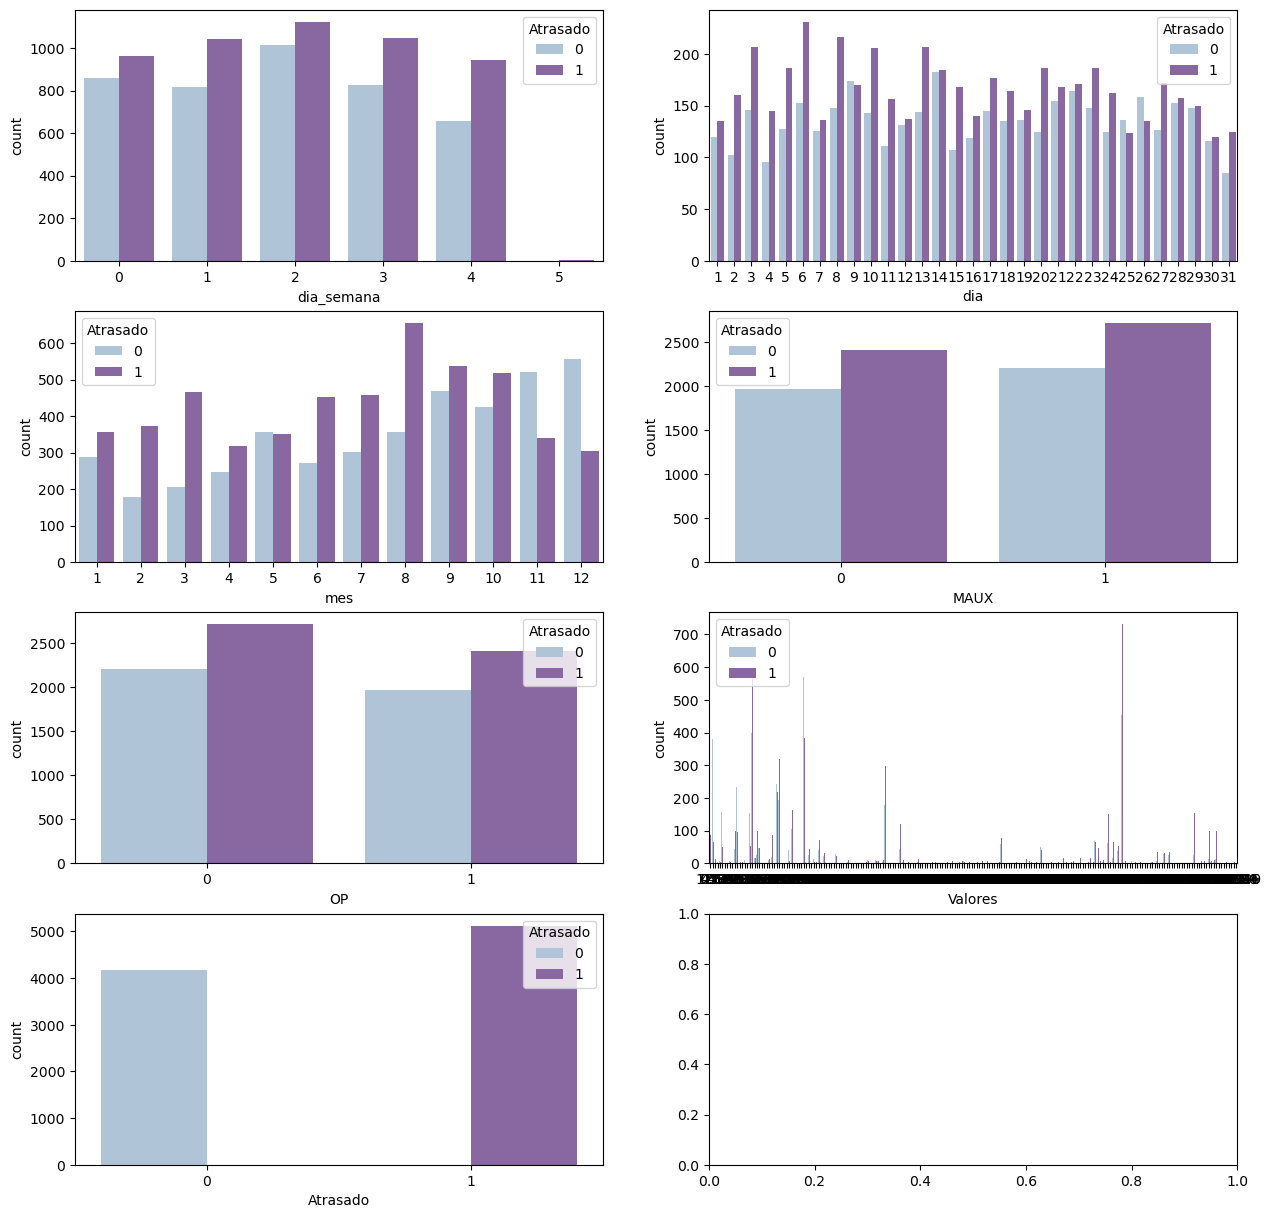

In [16]:
fig , ax = plt.subplots(4,2,figsize = (15,15))
#seaborn.countplot(x="dia_semana", hue="Atrasado",data=bd)
for i , subplots in zip (bd.columns, ax.flatten()):  
  seaborn.countplot(x=i,hue="Atrasado",data=bd,ax = subplots, palette = 'BuPu')
plt.show()

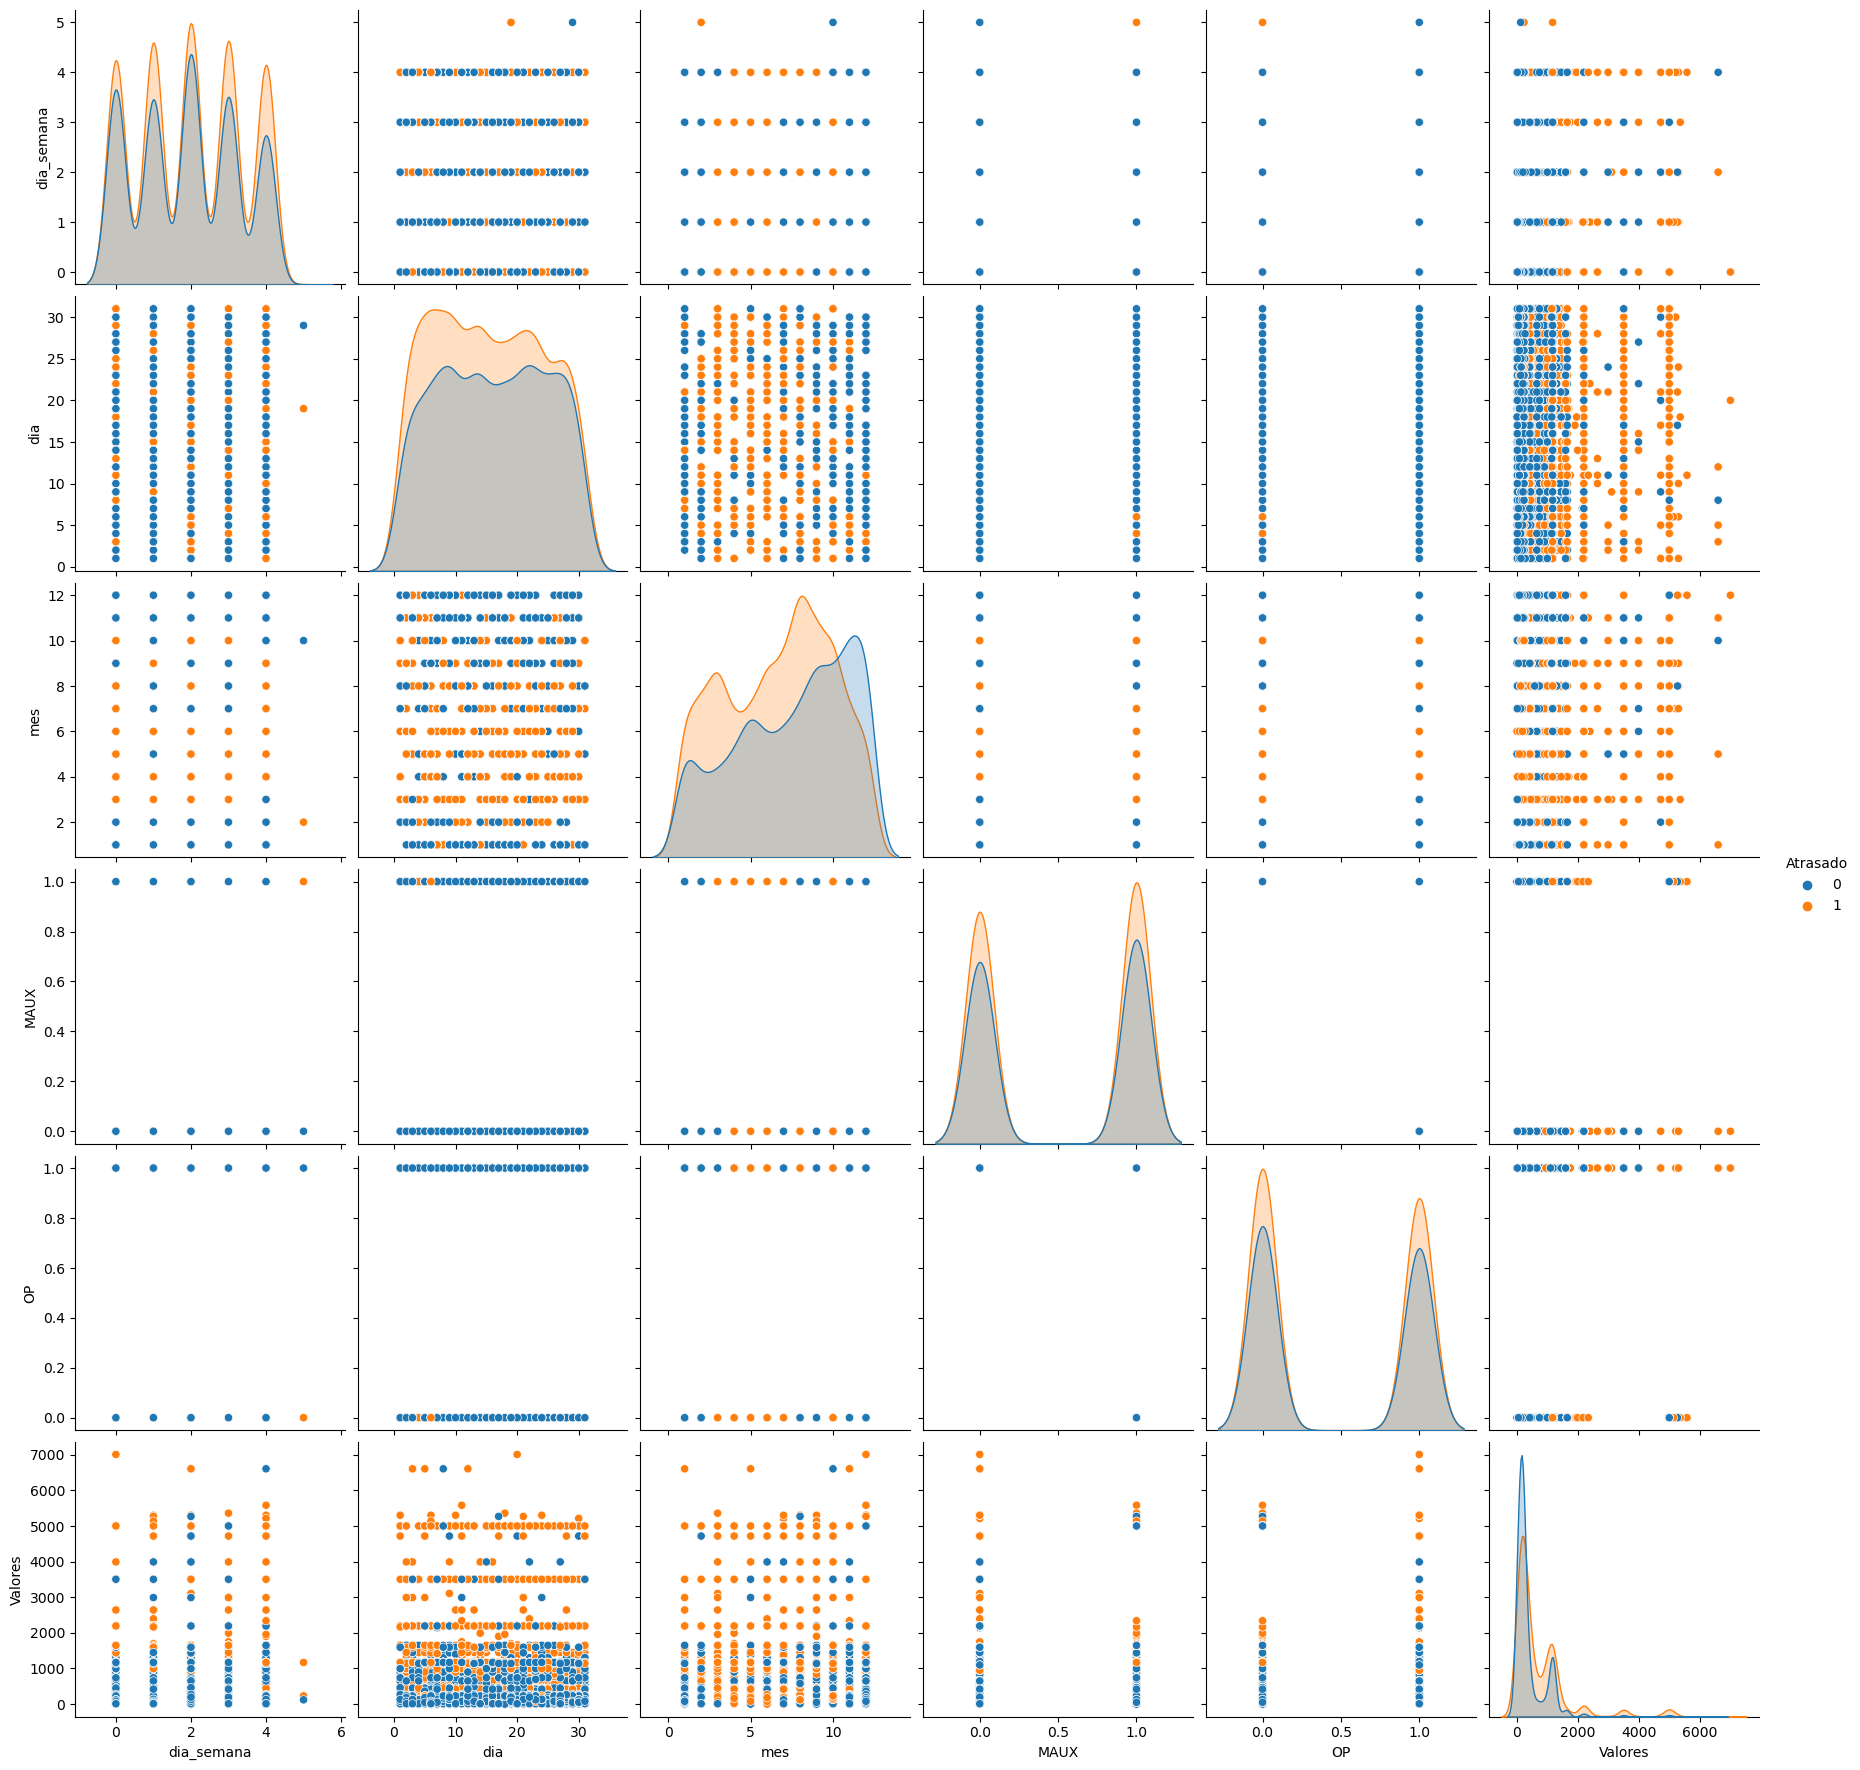

In [17]:
g = seaborn.pairplot(bd,vars=['dia_semana','dia','mes','MAUX','OP','Valores'] ,hue='Atrasado', height=3, diag_kind='kde')
#_ = g.map_lower(seaborn.kdeplot, levels=1, color=".2") 
plt.show()

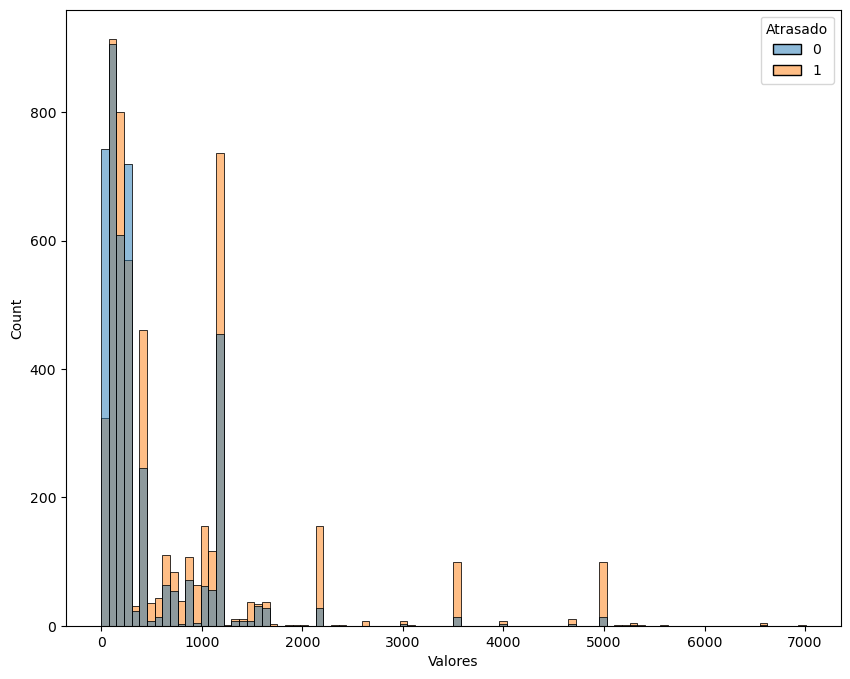

In [18]:
#import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))

seaborn.histplot(data=bd, x="Valores", hue="Atrasado", ax=ax)
plt.show()

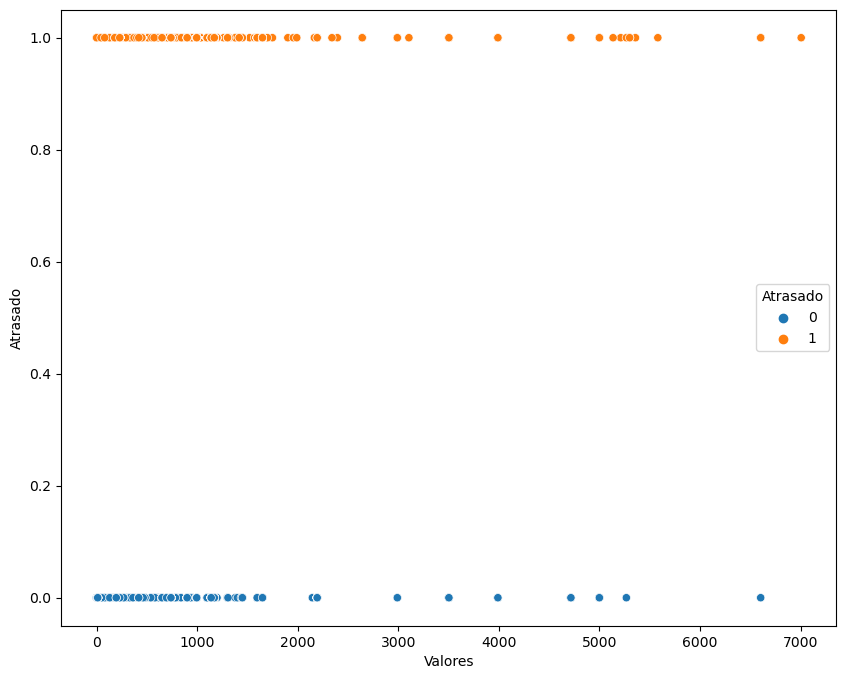

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))

seaborn.scatterplot(data=bd, x="Valores", y="Atrasado", hue="Atrasado", ax=ax)
plt.show()

# Regressão Logística

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#x = bd['Valores']
x = bd['Valores'].values.reshape((-1, 1))
y = bd['Atrasado']

##################
bd = bd.drop('Atrasado' ,axis = 1)
x = bd.to_numpy()
#################


pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(max_iter=10000, solver='liblinear'))
    ]
)

params = {
    'lr__penalty': ['l1', 'l2'],
    'lr__C': [0.1, 0.5, 1, 2, 10],
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)

In [21]:
pipe_logistica = GridSearchCV(
    pipe,
    params,
    cv=cv,
    scoring=['f1', 'precision', 'recall','accuracy'],
    refit='recall',  #FN mais prejudicial
    return_train_score=True,

)

In [22]:
pipe_logistica.fit(x, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=42),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(max_iter=10000,
                                                           solver='liblinear'))]),
             param_grid={'lr__C': [0.1, 0.5, 1, 2, 10],
                         'lr__penalty': ['l1', 'l2']},
             refit='recall', return_train_score=True,
             scoring=['f1', 'precision', 'recall', 'accuracy'])

In [23]:
pipe_logistica.best_score_

0.6975633528265107

In [24]:
pipe_logistica.best_params_

{'lr__C': 10, 'lr__penalty': 'l2'}

In [25]:
pipe_logistica.cv_results_

{'mean_fit_time': array([1.06754661e-02, 6.77239895e-03, 1.50163293e-02, 9.82542038e-03,
        2.09173083e-02, 4.50658798e-04, 1.94000959e-02, 7.57447481e-03,
        7.01584089e-01, 7.64839649e-03]),
 'std_fit_time': array([0.00867721, 0.00742568, 0.01159349, 0.00737258, 0.00691763,
        0.00196438, 0.01045124, 0.00735155, 0.23717375, 0.00259985]),
 'mean_score_time': array([0.00310302, 0.00156256, 0.00580269, 0.00306966, 0.00108178,
        0.00077997, 0.00261948, 0.        , 0.00275229, 0.00199636]),
 'std_score_time': array([0.00599053, 0.00468768, 0.00731615, 0.00614316, 0.0035696 ,
        0.00339983, 0.00559281, 0.        , 0.00565   , 0.00076847]),
 'param_lr__C': masked_array(data=[0.1, 0.1, 0.5, 0.5, 1, 1, 2, 2, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_lr__penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l

In [26]:
pipe_logistica.cv_results_['mean_test_f1']

array([0.65556741, 0.65707603, 0.65691779, 0.65704156, 0.65700996,
       0.65704156, 0.65710185, 0.65722636, 0.65722636, 0.65728838])

In [27]:
pipe_logistica.cv_results_['std_test_f1']

array([0.0130636 , 0.01316894, 0.01310424, 0.01330299, 0.013262  ,
       0.01330299, 0.01340351, 0.01327155, 0.01327155, 0.0132838 ])

In [28]:
pipe_logistica.cv_results_

{'mean_fit_time': array([1.06754661e-02, 6.77239895e-03, 1.50163293e-02, 9.82542038e-03,
        2.09173083e-02, 4.50658798e-04, 1.94000959e-02, 7.57447481e-03,
        7.01584089e-01, 7.64839649e-03]),
 'std_fit_time': array([0.00867721, 0.00742568, 0.01159349, 0.00737258, 0.00691763,
        0.00196438, 0.01045124, 0.00735155, 0.23717375, 0.00259985]),
 'mean_score_time': array([0.00310302, 0.00156256, 0.00580269, 0.00306966, 0.00108178,
        0.00077997, 0.00261948, 0.        , 0.00275229, 0.00199636]),
 'std_score_time': array([0.00599053, 0.00468768, 0.00731615, 0.00614316, 0.0035696 ,
        0.00339983, 0.00559281, 0.        , 0.00565   , 0.00076847]),
 'param_lr__C': masked_array(data=[0.1, 0.1, 0.5, 0.5, 1, 1, 2, 2, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_lr__penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l

In [29]:
#coef=pipe_clf.best_estimator_.steps[0][1].coef_
#intercept=pipe_clf.best_estimator_.steps[0][1].intercept_

In [30]:
pipe_logistica.best_score_

0.6975633528265107

In [31]:
"""
# Plotando a função Logística
x_plot = np.arange(0, 10000)
y_plot = 1.0/(1 + np.exp( -1 * (intercept + coef * x_plot)  ))

fig, ax = plt.subplots(figsize=(10, 8))

seaborn.scatterplot(data=bd, x="Valores", y="Atrasado", hue="Atrasado", ax=ax)
ax.plot(x_plot, y_plot.reshape((-1,)), 'r')
plt.show()
"""

'\n# Plotando a função Logística\nx_plot = np.arange(0, 10000)\ny_plot = 1.0/(1 + np.exp( -1 * (intercept + coef * x_plot)  ))\n\nfig, ax = plt.subplots(figsize=(10, 8))\n\nseaborn.scatterplot(data=bd, x="Valores", y="Atrasado", hue="Atrasado", ax=ax)\nax.plot(x_plot, y_plot.reshape((-1,)), \'r\')\nplt.show()\n'

In [32]:
y_test=pipe_logistica.predict(x)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y, y_test))

              precision    recall  f1-score   support

           0       0.56      0.48      0.52      4177
           1       0.62      0.70      0.66      5125

    accuracy                           0.60      9302
   macro avg       0.59      0.59      0.59      9302
weighted avg       0.59      0.60      0.59      9302



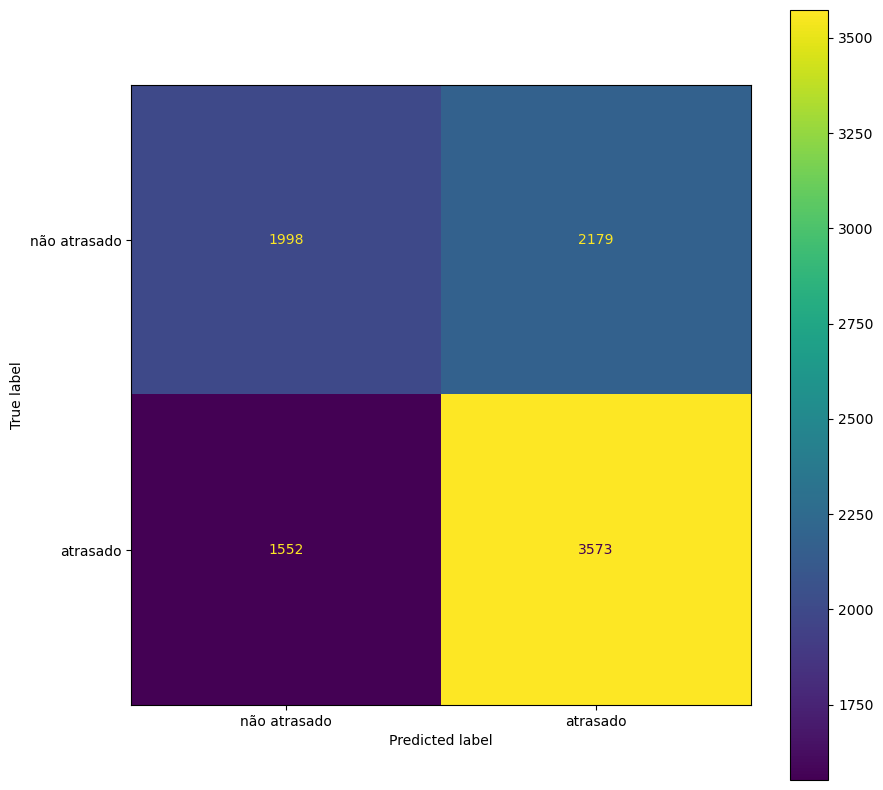

In [34]:
conf = confusion_matrix(y, y_test)
target_names=['não atrasado','atrasado']
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(conf, display_labels=target_names).plot(ax=ax, )
plt.show()

# Árvores de Classificação

In [35]:
from matplotlib import pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split


In [36]:
#y = bd['Atrasado']
#bd = bd.drop('Atrasado' ,axis = 1)

#x = bd.to_numpy()


In [37]:
bd

,dia_semana,dia,mes,MAUX,OP,Valores
0,1,6,11,1,0,4999.00
1,1,6,11,1,0,136.34
2,0,21,10,1,0,1170.00
3,0,21,10,1,0,136.34
4,1,17,11,1,0,1170.00
...,...,...,...,...,...,...
9297,2,22,2,0,1,195.00
9298,4,17,2,1,0,1649.00
9299,0,27,2,0,1,10.70
9300,0,27,2,0,1,10.70


In [38]:

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)

pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('dtree', DecisionTreeClassifier())
    ]
)

params = {
    'dtree__criterion':  ['gini', 'entropy'],
    'dtree__max_depth':  [3, 4, 5,6],
    'dtree__max_features': [None, 'sqrt', 'log2'],
    'dtree__splitter': ['best', 'random'],
}

pipe_arvore = GridSearchCV(
    #estimator=DecisionTreeClassifier(),
    estimator=pipe,
    param_grid=params,
    cv=cv,
    verbose=1,
    scoring=['f1', 'precision', 'recall','accuracy'],
    refit='recall',  #FN mais prejudicial    
    return_train_score=True,
)

pipe_arvore.fit(x, y)
print(pipe_arvore.best_params_)

Fitting 20 folds for each of 48 candidates, totalling 960 fits
{'dtree__criterion': 'entropy', 'dtree__max_depth': 3, 'dtree__max_features': None, 'dtree__splitter': 'best'}


In [39]:
pipe_arvore

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=42),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dtree', DecisionTreeClassifier())]),
             param_grid={'dtree__criterion': ['gini', 'entropy'],
                         'dtree__max_depth': [3, 4, 5, 6],
                         'dtree__max_features': [None, 'sqrt', 'log2'],
                         'dtree__splitter': ['best', 'random']},
             refit='recall', return_train_score=True,
             scoring=['f1', 'precision', 'recall', 'accuracy'], verbose=1)

In [40]:
print(pipe_arvore.best_score_)
print(pipe_arvore.best_params_)

0.892492461622807
{'dtree__criterion': 'entropy', 'dtree__max_depth': 3, 'dtree__max_features': None, 'dtree__splitter': 'best'}


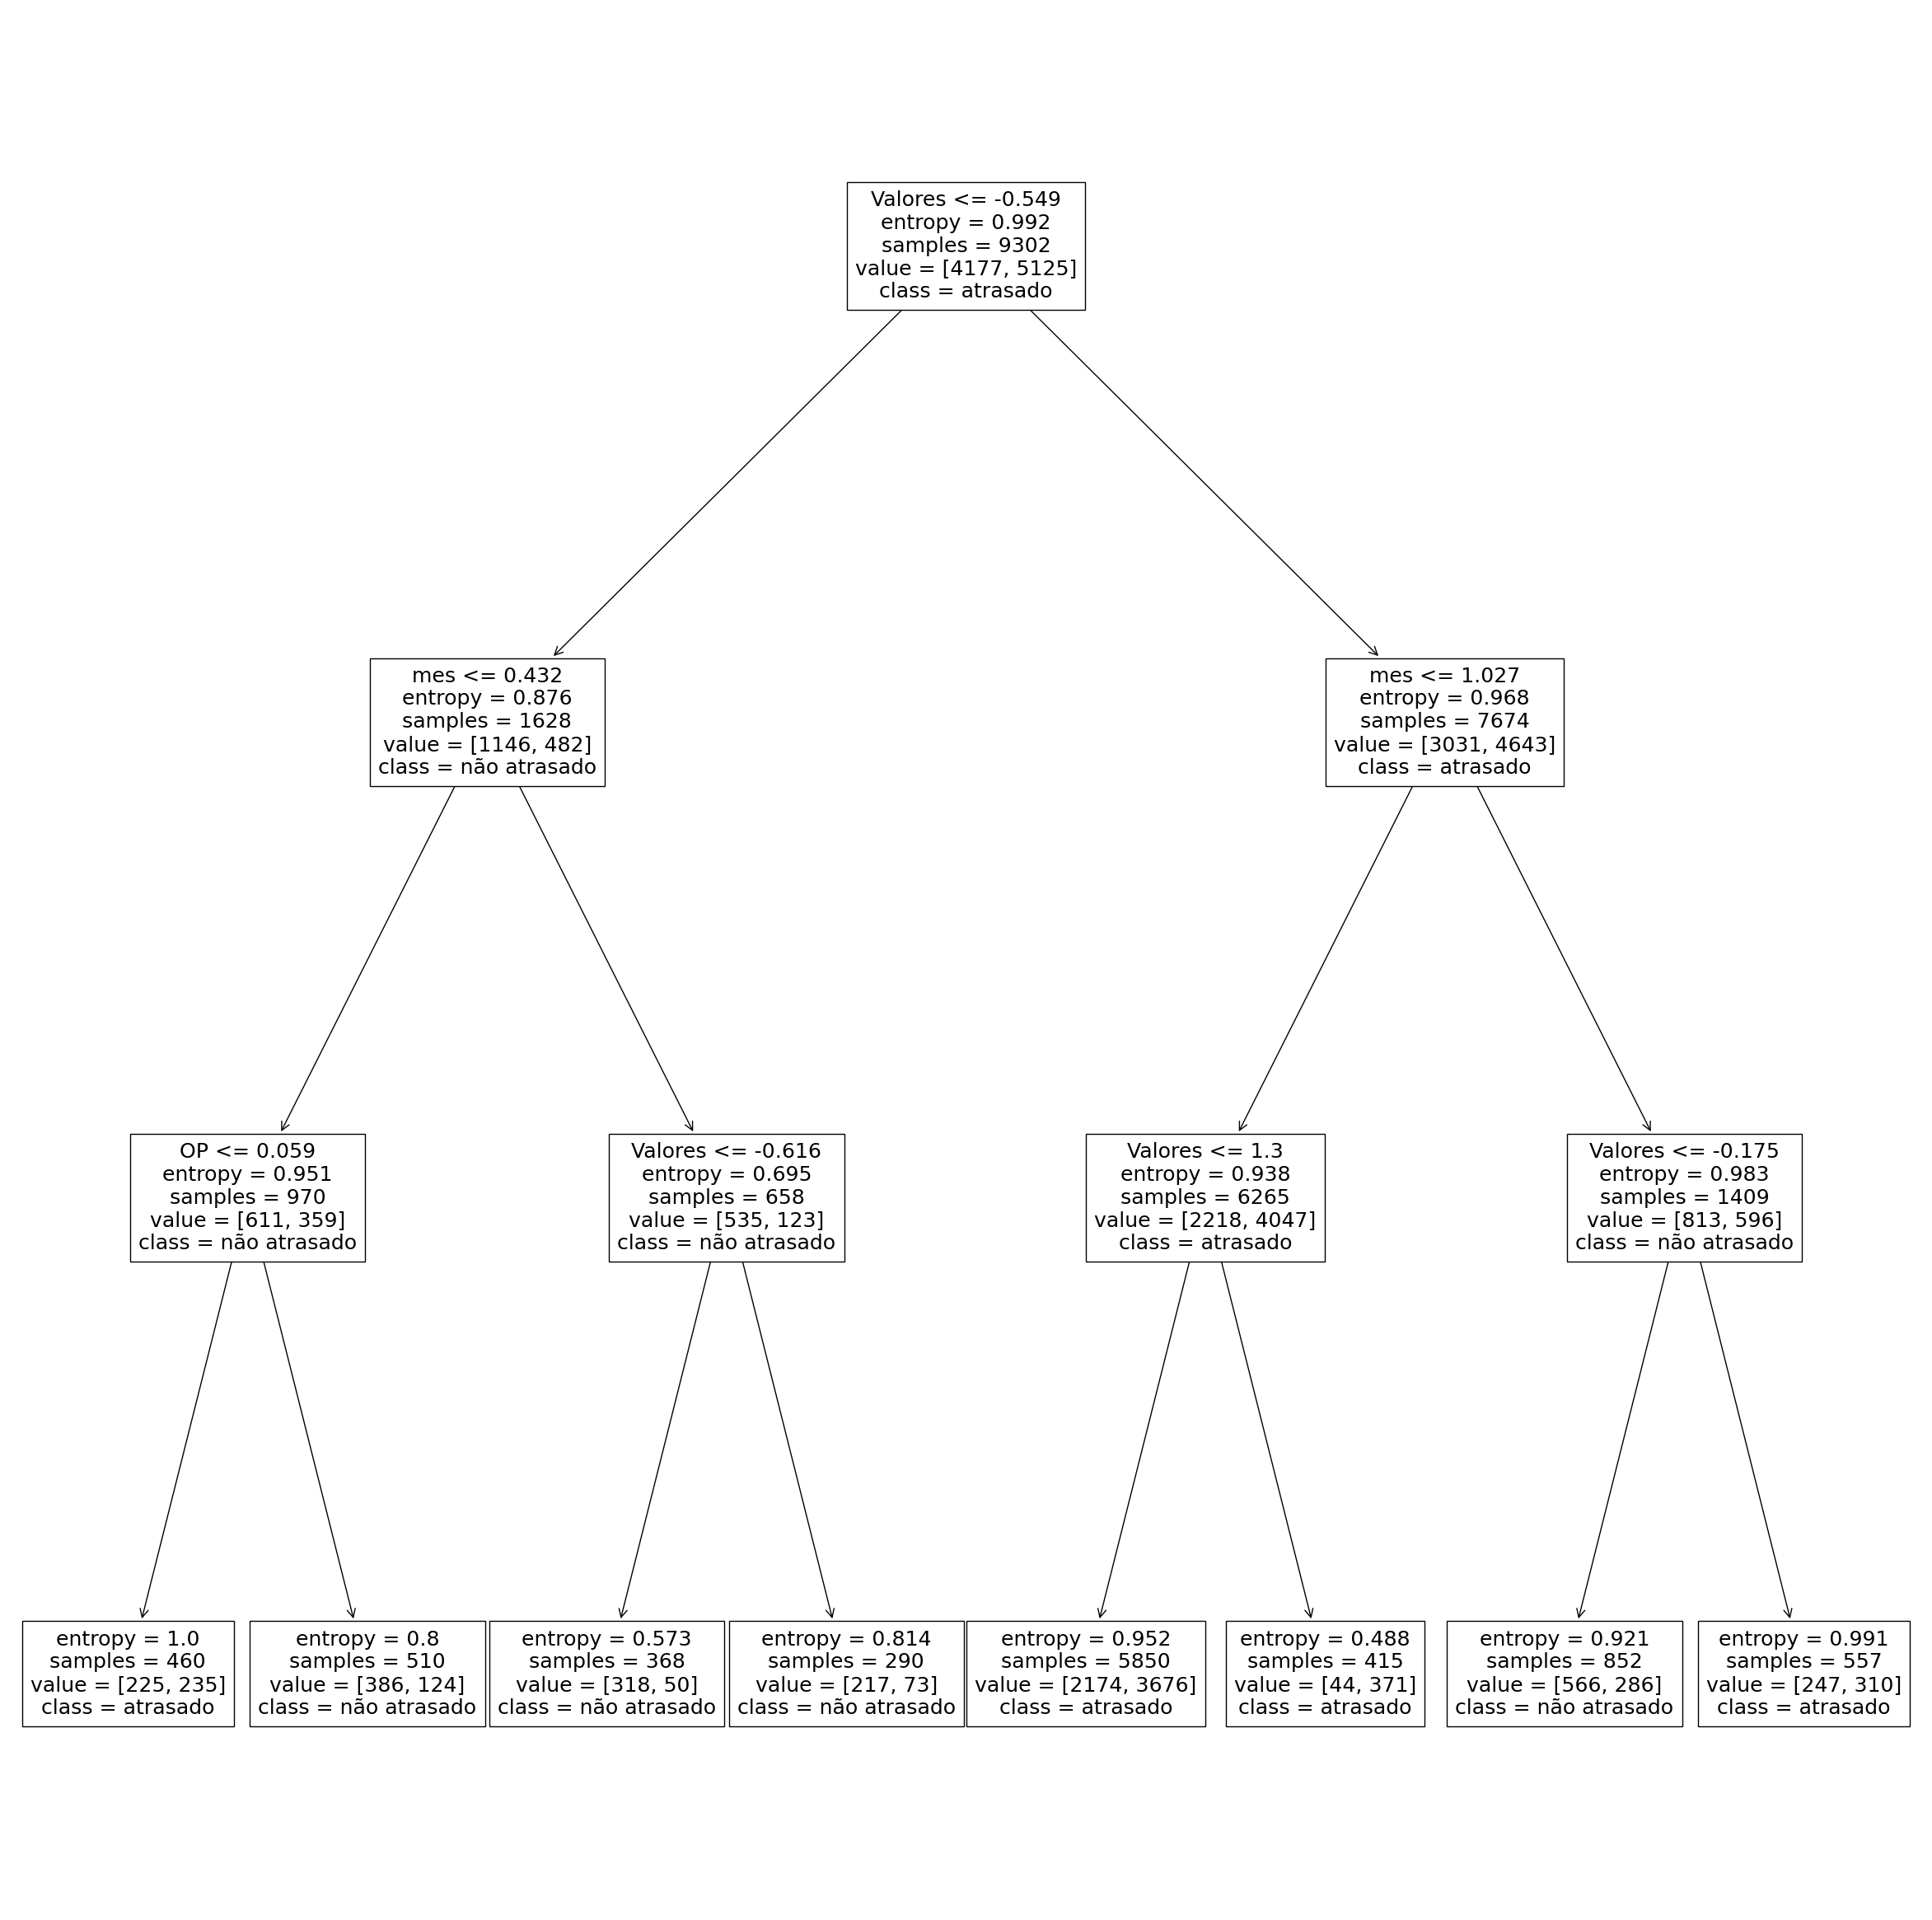

In [42]:
#avaliar com melhores parametros
#model_1 = DecisionTreeClassifier(**pipe_arvore.best_params_, random_state=42)
#model_1.fit(x, y)

#model_1= pipe_arvore.best_estimator


target_names=['não atrasado','atrasado']

fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(pipe_arvore.best_estimator_['dtree'],ax=ax,feature_names=list(bd.columns),class_names=target_names);
plt.show()

In [43]:
"""

model_1 = DecisionTreeClassifier(**pipe_arvore.best_params_, random_state=42)


#model_1= pipe_arvore.best_estimator_.predict(x)

target_names=['não atrasado','atrasado']

fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(model_1,ax=ax,feature_names=list(bd.columns),class_names=target_names);

plt.show()
"""

"\n\nmodel_1 = DecisionTreeClassifier(**pipe_arvore.best_params_, random_state=42)\n\n\n#model_1= pipe_arvore.best_estimator_.predict(x)\n\ntarget_names=['não atrasado','atrasado']\n\nfig, ax = plt.subplots(figsize=(30, 30))\nplot_tree(model_1,ax=ax,feature_names=list(bd.columns),class_names=target_names);\n\nplt.show()\n"

In [58]:
y_test=pipe_arvore.predict(x)
print(classification_report(y, y_test))

              precision    recall  f1-score   support

           0       0.74      0.36      0.48      4177
           1       0.63      0.90      0.74      5125

    accuracy                           0.65      9302
   macro avg       0.68      0.63      0.61      9302
weighted avg       0.68      0.65      0.62      9302



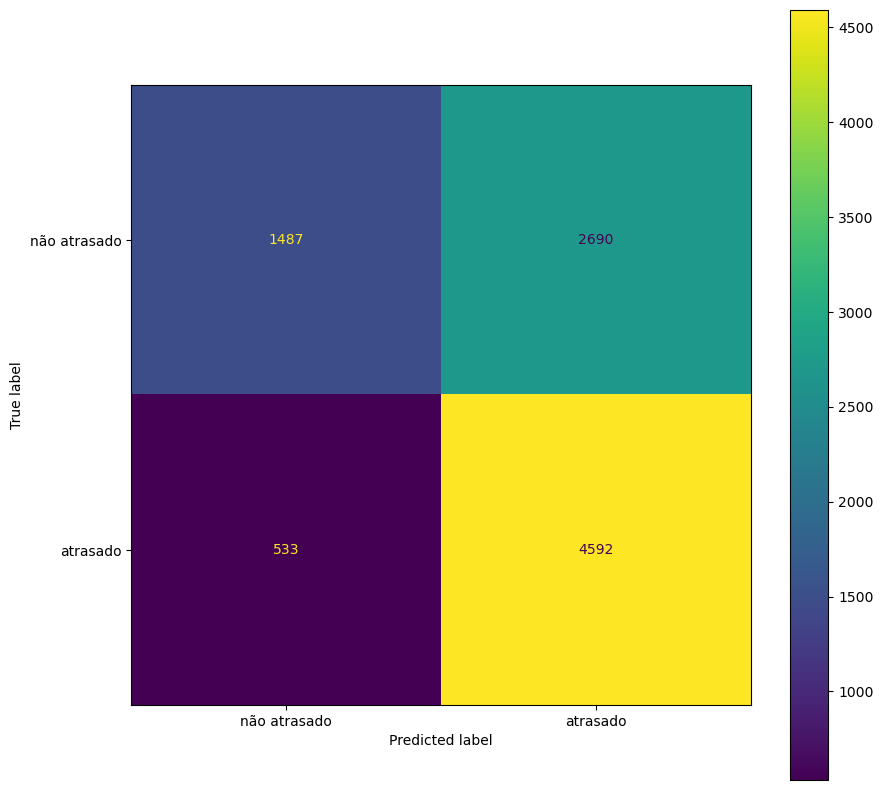

In [59]:
conf = confusion_matrix(y, y_test)

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(conf, display_labels=target_names).plot(ax=ax, )
plt.show()

# SVM

In [60]:
from sklearn.svm import SVC

In [61]:
'''
pipe_svm_lin = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='linear'))
    ]
)
params = {
    'svm__C': [0.1, 1, 5, 10],
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1)
pipe_clf_svm_lin = GridSearchCV(
    pipe_svm_lin,
    params,
    cv=cv,
    scoring=['f1', 'precision', 'recall'],
    refit='recall',
    return_train_score=True,

)
pipe_clf_svm_lin.fit(x, y)
'''

"\npipe_svm_lin = Pipeline(\n    [\n        ('scaler', StandardScaler()),\n        ('svm', SVC(kernel='linear'))\n    ]\n)\nparams = {\n    'svm__C': [0.1, 1, 5, 10],\n}\ncv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1)\npipe_clf_svm_lin = GridSearchCV(\n    pipe_svm_lin,\n    params,\n    cv=cv,\n    scoring=['f1', 'precision', 'recall'],\n    refit='recall',\n    return_train_score=True,\n\n)\npipe_clf_svm_lin.fit(x, y)\n"

In [62]:
pipe_svm_rbf = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf'))
    ]
)

params = {
    'svm__C': [0.1, 1, 5, 10],
    'svm__gamma': ['scale', 'auto'],
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2)
pipe_clf_svm_rbf = GridSearchCV(
    pipe_svm_rbf,
    params,
    cv=cv,
    scoring=['f1', 'precision', 'recall'],
    refit='recall',
    return_train_score=True,

)
pipe_clf_svm_rbf.fit(x, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 5, 10],
                         'svm__gamma': ['scale', 'auto']},
             refit='recall', return_train_score=True,
             scoring=['f1', 'precision', 'recall'])

In [63]:
pipe_clf_svm_rbf.best_score_

0.8249754431652047

In [64]:
pipe_clf_svm_rbf.best_params_

{'svm__C': 0.1, 'svm__gamma': 'scale'}

In [65]:
#Predict the response for test dataset
y_pred = pipe_clf_svm_rbf.predict(x)

In [66]:
pipe_clf_svm_rbf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=0.1))])

In [67]:
pipe_clf_svm_rbf.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('svm', SVC(C=0.1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'svm': SVC(C=0.1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'svm__C': 0.1,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 3,
 'svm__gamma': 'scale',
 'svm__kernel': 'rbf',
 'svm__max_iter': -1,
 'svm__probability': False,
 'svm__random_state': None,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False}

In [68]:
y_test=pipe_clf_svm_rbf.best_estimator_.predict(x)

In [69]:
#avaliar com melhores parametros

#model_svm = pipe_svm_rbf(**pipe_clf_svm_rbf.best_estimator_, random_state=42)
#model_svm.fit(x, y)


target_names=['não atrasado','atrasado']


In [70]:
conf = confusion_matrix(y, y_test)

#y_test=model_svm.predict(x)
print(classification_report(y, y_test))


              precision    recall  f1-score   support

           0       0.64      0.37      0.47      4177
           1       0.62      0.83      0.71      5125

    accuracy                           0.62      9302
   macro avg       0.63      0.60      0.59      9302
weighted avg       0.63      0.62      0.60      9302



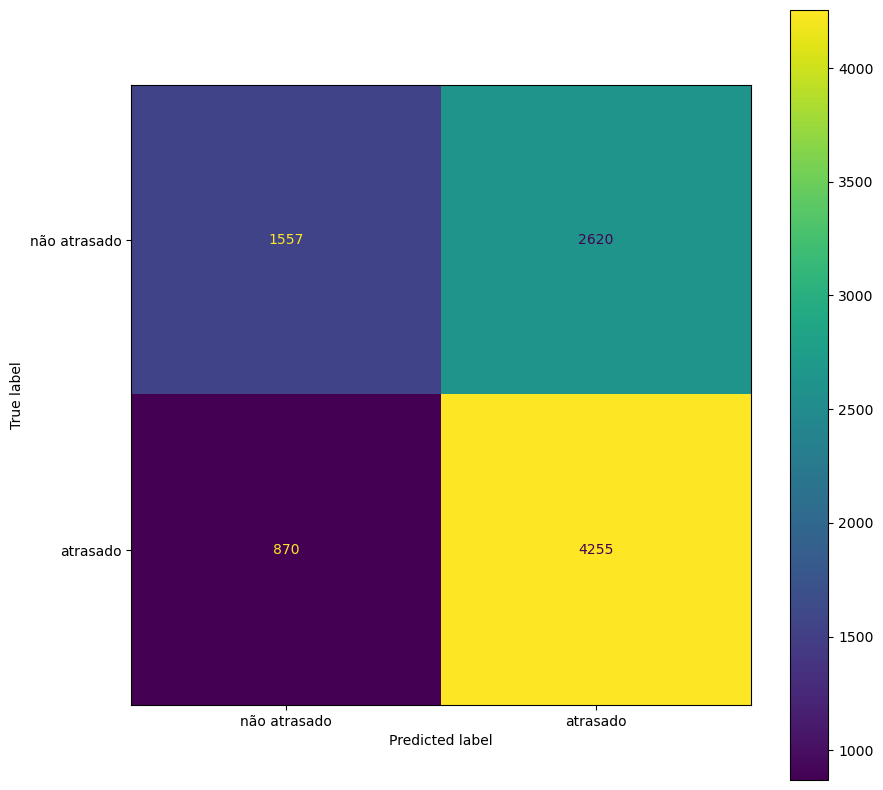

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(conf, display_labels=target_names).plot(ax=ax, )
plt.show()